<br/>

### Importing necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

from download import download

<br/>

### Getting the dataset

In [2]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip',
                '/tmp/aq', kind = 'zip')

df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 encoding='ISO-8859-1')

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


<br/>

### Dealing with datetime

In [3]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
df1 = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 parse_dates = [['year', 'month', 'day', 'hour']], date_parser = convert_to_date, keep_date_col = True)

<br/>

### Reconnaissance

In [5]:
df1.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
df1.shape

(35064, 19)

In [7]:
df1.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

<br/>

## Seeing the Null values

In [8]:
df1.query('TEMP != TEMP')

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,2015-01-27 20:00:00,16749,2015,1,27,20,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16813,2015-01-30 13:00:00,16814,2015,1,30,13,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16829,2015-01-31 05:00:00,16830,2015,1,31,5,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16873,2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16883,2015-02-02 11:00:00,16884,2015,2,2,11,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16930,2015-02-04 10:00:00,16931,2015,2,4,10,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16933,2015-02-04 13:00:00,16934,2015,2,4,13,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17007,2015-02-07 15:00:00,17008,2015,2,7,15,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17030,2015-02-08 14:00:00,17031,2015,2,8,14,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17052,2015-02-09 12:00:00,17053,2015,2,9,12,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [42]:
<br/>
<br/>

## Another way to see the Null Values

SyntaxError: invalid syntax (<ipython-input-42-1d088af8f952>, line 1)

In [9]:
df1[df1['PM2.5'].isnull()]

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
752,2013-04-01 08:00:00,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,2013-04-01 09:00:00,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,2013-04-01 10:00:00,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
755,2013-04-01 11:00:00,756,2013,4,1,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
756,2013-04-01 12:00:00,757,2013,4,1,12,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,2017-02-20 15:00:00,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,2017-02-20 16:00:00,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,2017-02-20 18:00:00,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,2017-02-21 11:00:00,34884,2017,2,21,11,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


<br/>

### Setting the index

In [10]:
df1 = df1.set_index('year_month_day_hour')

<br/>

## Plotting the Missing Values (Random Choice)

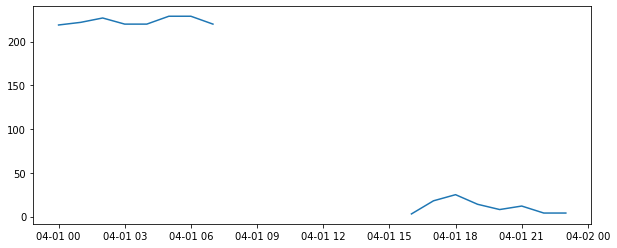

In [11]:
plt.figure(figsize = (10, 4))

df_nan = df1['2013-04-01']
pm_nan = df_nan[['PM2.5']]
plt.plot(pm_nan)

plt.show()

<br/>

### Droping the NaN values

In [13]:
rmvd_nan = df1.copy()
rmvd_nan = rmvd_nan.dropna()

**Note:**  
Now we are going to create a **Autocorrelation Plot**. That's why we had to remove the NaN values.

<br/>

## Autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

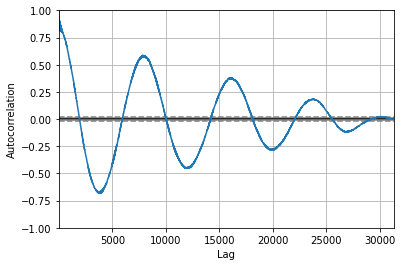

In [15]:
pd.plotting.autocorrelation_plot(rmvd_nan['TEMP'])

<br/>

## Lag Plots

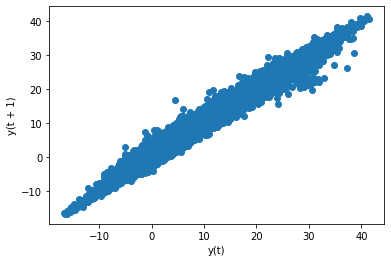

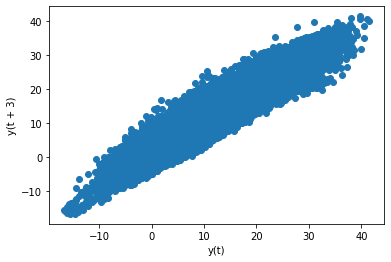

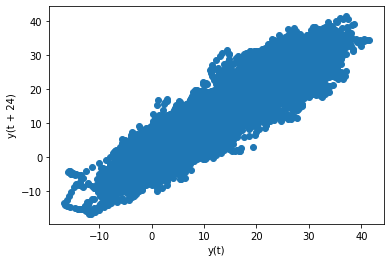

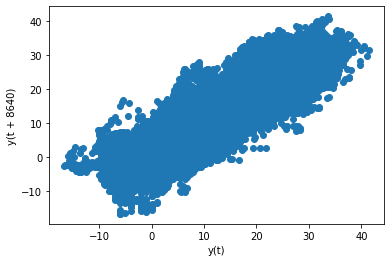

In [26]:
lags = [1, 3, 24, 8640]

for i in lags:
    pd.plotting.lag_plot(df1['TEMP'], lag = i)
    plt.show()

**Note:**  
    As the lag value increases, the points are getting more scattered. Because with the increment of lag value the relationship is getting reduced.

In [28]:
df_imp = df1['2015-02-21 10' : '2015-02-21 23'][['TEMP']]
df_imp

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


**Note:**  
    We create a concise dataframe to work with and got 3 missing values.

<br/>

## Filling the missing values with Forward Fill

In [29]:
df_imp['ffill'] = df_imp['TEMP'].fillna(method = 'ffill')
df_imp

,TEMP,ffill
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


**Note:**  
**ffill** takes the current previous value and place it in the **NaN** value.

<br/>

## Backward Fill

In [31]:
df_imp['bfill'] = df_imp['TEMP'].fillna(method = 'bfill')
df_imp

,TEMP,ffill,bfill
year_month_day_hour,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


**Note:**  
**bfill** takes the current next value and place it in the **NaN** value.  
But it's not preferable to apply specially when we will have to do forecasting. Because we won't have the next value to fill with then.

<br/>

## Rolling Window
What does Rolling Window do? It takes the previous **n** values, computes the **mean** and plcae it in the NaN.  
**window = 2** - How many previous values I want to take to calculate  
**min_periods = 1** - If there is also NaN values, how many value it will take.

In [34]:
df_imp['Rolling'] = df_imp['TEMP'].rolling(window = 2, min_periods = 1).mean()
df_imp

,TEMP,ffill,bfill,Rolling
year_month_day_hour,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.5
2015-02-21 18:00:00,2.0,2.0,2.0,2.5


<br/>

## Filling with Previous period(year/ month/ week) value

In [37]:
# Taking the previous years value

df1.loc[df_imp.index + pd.offsets.DateOffset(years = -1)]['TEMP']

year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
2014-02-21 21:00:00    1.1
2014-02-21 22:00:00    0.7
2014-02-21 23:00:00    0.6
Name: TEMP, dtype: float64

In [39]:
df_imp = df_imp.reset_index()
df_imp

,index,year_month_day_hour,TEMP,ffill,bfill,Rolling
0,0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0
1,1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2,2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0
3,3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0
4,4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0
5,5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0
6,6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0
7,7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5
8,8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5
9,9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5


In [40]:
df_imp['previous_year'] = df_imp.apply(lambda x: df1.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years = -1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis  = 1)
df_imp

,index,year_month_day_hour,TEMP,ffill,bfill,Rolling,previous_year
0,0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
1,1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2,2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.9
3,3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
4,4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,4.9
5,5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
6,6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
7,7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5,3.0
8,8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5,2.0
9,9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5,1.0


<br/>
<br/>

**Gratitude:** AIEngineering